#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [2]:
!pip install mysql-connector-python
import mysql.connector
from mysql.connector.connection import MySQLConnection
import datetime
con = mysql.connector.connect(user='root', password='B0984298936n',
                              host='127.0.0.1',
                              database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [17]:
import pandas as pd

# SQL-запит для отримання кількості співробітників за роком найму
query = """
SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS employee_count
FROM employees
GROUP BY hire_year
ORDER BY hire_year;
"""

# Виконання запиту та збереження результату в DataFrame
df = pd.read_sql(query, con)

print(df)

C:\Users\hp\AppData\Local\Temp\ipykernel_13012\797039631.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, con)


    hire_year  employee_count
0        1985           35316
1        1986           36150
2        1987           33501
3        1988           31436
4        1989           28394
5        1990           25610
6        1991           22568
7        1992           20402
8        1993           17772
9        1994           14835
10       1995           12115
11       1996            9574
12       1997            6669
13       1998            4155
14       1999            1514
15       2000              13


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

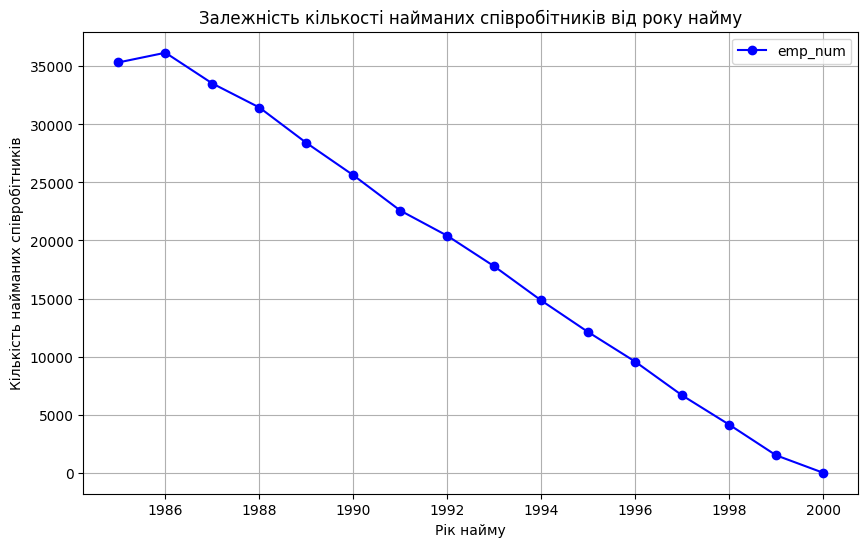

In [30]:
!pip install -q pymysql

from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Створення двигуна для підключення
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database_name}')

# SQL-запит для отримання кількості співробітників за роком найму та сортування за роком
query = """
SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS employee_count
FROM employees
GROUP BY hire_year
ORDER BY hire_year;
"""

# Виконання запиту та завантаження результату в DataFrame
df = pd.read_sql(query, engine)

# Побудова лінійного графіка
plt.figure(figsize=(10, 6))
plt.plot(df['hire_year'], df['employee_count'], marker='o', linestyle='-', color='b',label='emp_num')
plt.title('Залежність кількості найманих співробітників від року найму')
plt.xlabel('Рік найму')
plt.ylabel('Кількість найманих співробітників')
plt.grid()
plt.legend()  
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [38]:
query = """
SELECT 
    TIMESTAMPDIFF(YEAR, t.from_date, t.to_date) AS duration,
    t.from_date,
    t.to_date
FROM 
    titles t
WHERE 
    t.title = 'Engineer' 
    AND t.to_date != '9999-01-01';  -- Фільтруємо тих, хто вже не працює
"""
df_years = pd.read_sql(query, engine)
print(df_years)


       duration   from_date     to_date
0             9  1986-12-01  1995-12-01
1             5  1990-02-18  1995-02-18
2             8  1992-12-18  2000-12-18
3             8  1987-04-03  1995-04-03
4             5  1995-03-20  2001-03-19
...         ...         ...         ...
84015         9  1989-11-23  1998-11-23
84016         5  1989-07-30  1994-07-30
84017         0  1993-02-22  1993-10-27
84018         6  1996-05-13  2002-05-13
84019         4  1987-08-30  1992-08-29

[84020 rows x 3 columns]


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

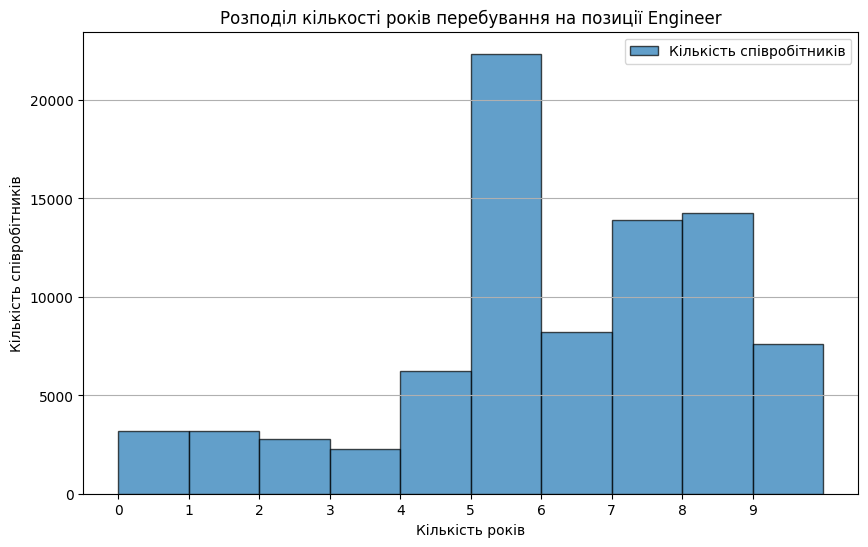

In [39]:
import matplotlib.pyplot as plt

# Припустимо, df_years вже визначений як DataFrame з запитом, виконаним раніше
# df_years = pd.read_sql(query, engine)

# Побудова гістограми
plt.figure(figsize=(10, 6))
plt.hist(df_years['duration'], bins=range(int(df_years['duration'].min()), int(df_years['duration'].max()) + 2), edgecolor='black', alpha=0.7)
plt.title('Розподіл кількості років перебування на позиції Engineer')
plt.xlabel('Кількість років')
plt.ylabel('Кількість співробітників')
plt.xticks(range(int(df_years['duration'].min()), int(df_years['duration'].max()) + 1))

# Додавання легенди
plt.legend(['Кількість співробітників'])

# Показати графік
plt.grid(axis='y')
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [40]:
con.close()